In [1]:
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose, UpSampling2D
from keras.datasets import mnist
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train,_) , (x_test , _) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

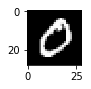

In [4]:
plt.figure(figsize = (1,1))
plt.imshow(x_train[1,:,:] , shape = (1,28,28) , cmap = 'gray')

In [5]:
noise = np.random.normal(loc=0, scale=1, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0, scale=1, size=x_test.shape)
x_test_noisy = x_test + noise

In [6]:
x_train_noisy.shape

(60000, 28, 28)

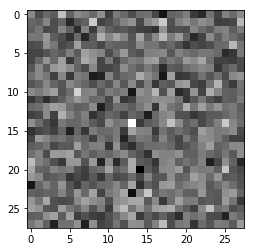

In [7]:
noise_plot = x_train_noisy[1,:,:] - x_train[1,:,:]
plt.imshow(noise_plot , cmap = 'gray')

In [8]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
x_train_noisy.shape

(60000, 28, 28)

In [10]:
noise = np.random.normal(loc=0, scale=1, size=x_train.shape)
x_train_noisy = x_train + noise

In [11]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [12]:
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
latent_dim = 16
act = 'relu'

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(8 , 3 , input_shape = (28,28,1)))
model.add(Activation(act))

model.add(Conv2D(16 , 3))
model.add(Activation(act))

model.add(Conv2D(32 , 3))
model.add(Activation(act))

model.add(Conv2D(64,3))
model.add(Activation(act))

model.add(Conv2DTranspose(64,3))
model.add(Activation(act))

model.add(Conv2DTranspose(16,3))
model.add(Activation(act))

model.add(Conv2DTranspose(8,3))
model.add(Activation(act))

model.add(Conv2DTranspose(1,3))
model.add(Activation(act))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
activation_3 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        18496     
__________

In [16]:
model.compile(loss = 'mse' , optimizer = 'adam')

In [17]:
model.fit(x_train_noisy , x_train , verbose = 1 , epochs = 10000)

Epoch 1/10000
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0353
Epoch 2/10000
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0327
Epoch 3/10000
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0320
Epoch 4/10000
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0316
Epoch 5/10000
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0313
Epoch 6/10000
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0312
Epoch 7/10000
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0310
Epoch 8/10000
60000/60000 [==============================] - 286s 5ms/step - loss: 0.0309
Epoch 9/10000
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0307
Epoch 10/10000
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0307
Epoch 11/10000
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0306
Epoch 12

60000/60000 [==============================] - 284s 5ms/step - loss: 0.0288
Epoch 92/10000
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0288
Epoch 93/10000
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0288
Epoch 94/10000
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0288
Epoch 95/10000
60000/60000 [==============================] - 286s 5ms/step - loss: 0.0288
Epoch 96/10000
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0288
Epoch 97/10000
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0287
Epoch 98/10000
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0287
Epoch 99/10000
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0287
Epoch 100/10000
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0287
Epoch 101/10000
50880/60000 [========================>.....] - ETA: 43s - loss: 0.0286

KeyboardInterrupt: 

In [18]:
import h5py
model.save('denoising-autenc.h5')        